In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# read json files in "Stress" folder
from glob import glob
for f_name in glob('Data/Stress/*.json'):
    user_df = pd.read_json(f_name)

# Prepare data

In [3]:
def get_date(row):
    date = row.split()[0] # get the date, leave out the time
    return date

def handle_NA(df,feature):
    '''
    This function takes in a dataframe and its feature that want to handle NA values with mean values
    input: dataframe, and its relevant features
    output: the feature of the dataframe with its NA values replaced by mean
    
    '''
    df[feature] = df[feature].replace(np.nan, np.mean(df[feature]))
    return df[feature]


def clean_resp_time(df):
    '''
    this function takes in a dataframe, and output a dataframe with clean resp time.
    input: data frame;
    output: data frame with nice-formatted resp_time
    '''
    
    df['resp_time'] = pd.to_datetime(df.resp_time)
    df.sort_values(by=['resp_time'],inplace=True)
    df.resp_time = df.resp_time.astype('str')
    df.resp_time = df.resp_time.apply(get_date)    
    df = df.groupby('resp_time').mean()
    df = df.reset_index()
    return df

In [4]:
def get_stress_data(f_name):
    user_df = pd.read_json(f_name)
    user_df.level = user_df.level.replace([4.0, 5.0], 0)  # Stress level: "4" means feeling good, "5" means feeling great, so convert to 0
    user_stress = user_df[['level','resp_time']]

    # clean date time data
    user_stress['resp_time'] = pd.to_datetime(user_stress.resp_time)
    user_stress.sort_values(by=['resp_time'],inplace=True)

    # handle NA values
    # user_stress = user_stress.dropna()
    user_stress.level = user_stress.level.replace(np.nan,np.mean(user_stress.level))
    user_stress.resp_time = user_stress.resp_time.astype('str')
    user_stress.resp_time = user_stress.resp_time.apply(get_date)    
    user_stress = user_stress.groupby('resp_time').mean()
    user_stress = user_stress.rename(columns = {'level':'stress_level'})
    user_stress = user_stress.reset_index()

    return user_stress

u44_stress = get_stress_data('Data/Stress/Stress_u44.json')
u44_stress.head()

/anaconda3/envs/si618/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/anaconda3/envs/si618/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/envs/si618/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

,resp_time,stress_level
0,2013-03-24,0.908046
1,2013-04-03,0.000000
2,2013-04-04,0.333333
3,2013-04-05,0.250000
4,2013-04-06,0.500000


In [5]:
def get_actitivity_data(f_name):
    # read in activity data (u44)
    user_Activity = pd.read_json(f_name)
    user_Activity = user_Activity[['Social2','working','relaxing','resp_time']]

    # convert NA to mean value
    user_Activity['Social2'] = handle_NA(user_Activity,'Social2')
    user_Activity['working'] = handle_NA(user_Activity,'working')
    user_Activity['relaxing'] = handle_NA(user_Activity,'relaxing')
    
    user_Activity = clean_resp_time(user_Activity)
    
    return user_Activity

u44_activity = get_actitivity_data('Data/Activity/Activity_u44.json') 
u44_activity.head()  # working NA -> above average: because many missing values exist in working and relaxing
len(u44_activity)

42

In [6]:
def get_sleep_data(f_name):
    user_sleep = pd.read_json(f_name)
    user_sleep = user_sleep[['resp_time','hour','rate']]

    # convert NA to mean value
    user_sleep['hour'] = handle_NA(user_sleep,'hour')
    user_sleep['rate'] = handle_NA(user_sleep,'rate')
    user_sleep = user_sleep.rename(columns = {'hour':'sleep_hour','rate':'sleep_rate'})
    user_sleep = clean_resp_time(user_sleep)
    
    return user_sleep

u44_sleep = get_sleep_data('Data/Sleep/Sleep_u44.json')
len(u44_sleep)

52

In [7]:
def get_behavior_data(f_name):
    user_behavior = pd.read_json(f_name)
    user_behavior = user_behavior[['resp_time','anxious','calm','disorganized','enthusiastic', 'critical','conventional']]
    
    user_behavior = user_behavior[['resp_time','anxious','calm','disorganized','enthusiastic', 'critical','conventional']]
    user_behavior.conventional = user_behavior.conventional.replace('null',np.nan).astype('float64')
    user_behavior.anxious = user_behavior.anxious.replace('null',np.nan).astype('float64')
    user_behavior.calm = user_behavior.calm.replace('null',np.nan).astype('float64')
    user_behavior.disorganized = user_behavior.disorganized.replace('null',np.nan).astype('float64')
    user_behavior.enthusiastic = user_behavior.enthusiastic.replace('null',np.nan).astype('float64')
    
    for col in ['anxious','calm','disorganized','enthusiastic','critical','conventional']:
        user_behavior[col] = handle_NA(user_behavior,col)

    user_behavior = clean_resp_time(user_behavior)
    return user_behavior

u44_behavior = get_behavior_data('Data/Behavior/Behavior_u44.json')
len(u44_behavior)

44

In [8]:
def get_exercise_date(f_name):
    user_exercise = pd.read_json(f_name)
    user_exercise = user_exercise[['resp_time','exercise']]
    user_exercise['exercise'] = handle_NA(user_exercise,'exercise')
    user_exercise = clean_resp_time(user_exercise)
    return user_exercise

u44_exercise = get_exercise_date('Data/Exercise/Exercise_u44.json')
len(u44_exercise)

38

In [9]:
def get_lab_data(f_name):
    user_lab = pd.read_json(f_name)
    user_lab = user_lab[['resp_time','duration']]
    user_lab['duration'] = handle_NA(user_lab,'duration')
    user_lab = clean_resp_time(user_lab)
    return user_lab

u44_lab = get_lab_data('Data/Lab/Lab_u44.json')
len(u44_lab)

6

In [10]:
def get_social_data(f_name):
    user_social = pd.read_json(f_name)
    user_social = user_social[['resp_time','number']]
    user_social['number'] = handle_NA(user_social,'number')
    user_social = user_social.rename(columns = {'number':'social_number'})
    user_social = clean_resp_time(user_social)
    return user_social

u44_social = get_social_data('Data/Social/Social_u44.json')
u44_social.head()
len(u44_social)

50

# Join dataframe & Plot

In [11]:
# join multiple dataframes
joined_df = pd.merge(u44_stress,u44_sleep,how='inner',on='resp_time') 
joined_df = pd.merge(joined_df,u44_exercise,how='inner',on='resp_time') 
# joined_df = pd.merge(joined_df,u44_lab,how='inner',on='resp_time') 
joined_df = pd.merge(joined_df,u44_activity,how='inner',on='resp_time') 
joined_df = pd.merge(joined_df,u44_social,how='inner',on='resp_time') 
joined_df = pd.merge(joined_df,u44_behavior,how='inner',on='resp_time') 
joined_df.head()

,resp_time,stress_level,sleep_hour,sleep_rate,exercise,Social2,working,relaxing,social_number,anxious,calm,disorganized,enthusiastic,critical,conventional
0,2013-04-03,0.000000,7.0,1.0,1,1.00,3.435897,1.487179,2.0,2.56,3.44,3.093333,2.733333,2.266667,3.9
1,2013-04-04,0.333333,8.0,1.5,1,4.00,3.435897,1.487179,2.0,2.56,3.44,3.093333,2.733333,2.266667,3.9
2,2013-04-05,0.250000,6.0,1.0,1,4.00,3.435897,1.487179,2.0,2.56,3.44,3.093333,2.733333,2.266667,3.9
3,2013-04-07,1.000000,8.0,1.0,1,3.00,3.435897,1.487179,2.0,2.56,3.44,3.093333,2.733333,2.266667,3.9
4,2013-04-08,1.000000,7.0,2.0,1,3.75,3.717949,1.743590,2.0,1.00,4.00,3.000000,2.000000,1.000000,4.0


In [12]:
# output clean data to csv file
joined_df.to_csv('Students/u44_data.csv',index = False)

In [13]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
data = pd.read_csv('Students/u44_data.csv', parse_dates=['resp_time'], index_col=['resp_time'],date_parser=dateparse)

In [14]:
data.index

DatetimeIndex(['2013-04-03', '2013-04-04', '2013-04-05', '2013-04-07',
               '2013-04-08', '2013-04-09', '2013-04-10', '2013-04-11',
               '2013-04-21', '2013-04-22', '2013-04-25', '2013-04-27',
               '2013-04-29', '2013-05-01', '2013-05-02', '2013-05-12',
               '2013-05-15', '2013-05-16', '2013-05-17', '2013-05-19',
               '2013-05-24'],
              dtype='datetime64[ns]', name='resp_time', freq=None)

# 分析 Stress scale data

In [16]:
ts = data['stress_level']
ts.head(10)

from datetime import datetime
ts[:'2013-04-07']  #包含结束索引

resp_time
2013-04-03    0.000000
2013-04-04    0.333333
2013-04-05    0.250000
2013-04-07    1.000000
Name: stress_level, dtype: float64

In [17]:
ts['2013-04']

resp_time
2013-04-03    0.000000
2013-04-04    0.333333
2013-04-05    0.250000
2013-04-07    1.000000
2013-04-08    1.000000
2013-04-09    0.750000
2013-04-10    1.500000
2013-04-11    1.000000
2013-04-21    1.000000
2013-04-22    2.000000
2013-04-25    1.000000
2013-04-27    1.000000
2013-04-29    2.000000
Name: stress_level, dtype: float64

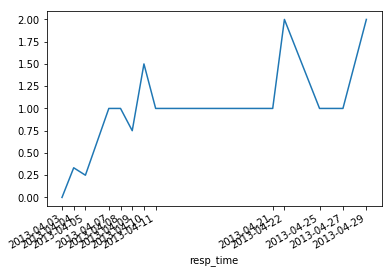

In [18]:
ax = ts['2013-04'].plot() # plot四月情况
ax.set_xticks(ts['2013-04'].index)
plt.show()

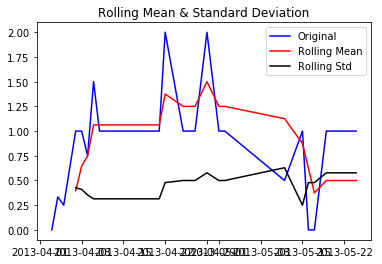

Results of Dickey-Fuller Test:
Test Statistic                 -0.000000
p-value                         0.958532
#Lags Used                      9.000000
Number of Observations Used    11.000000
Critical Value (1%)            -4.223238
Critical Value (5%)            -3.189369
Critical Value (10%)           -2.729839
dtype: float64


/anaconda3/envs/si618/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1510: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


In [19]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(4).mean()  # data量太少,故调小一点sliding window size
    rolstd = timeseries.rolling(4).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

test_stationarity(ts)

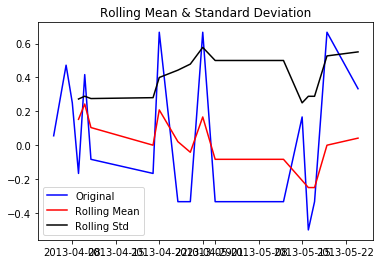

Results of Dickey-Fuller Test:
Test Statistic                 -0.000000
p-value                         0.958532
#Lags Used                      8.000000
Number of Observations Used    10.000000
Critical Value (1%)            -4.331573
Critical Value (5%)            -3.232950
Critical Value (10%)           -2.748700
dtype: float64


In [36]:
# ts_log_moving_avg_diff = ts_log - moving_avg
ts_moving_avg_diff = ts - moving_avg
# ts_log_moving_avg_diff.head()
ts_moving_avg_diff.head()

# ts_log_moving_avg_diff.dropna(inplace=True)
ts_moving_avg_diff.dropna(inplace=True)
# test_stationarity(ts_log_moving_avg_diff)    # p-value = 0.95 > 0.05, 说明timeseries不稳定
test_stationarity(ts_moving_avg_diff)    # p-value = 0.95 > 0.05, 说明timeseries不稳定

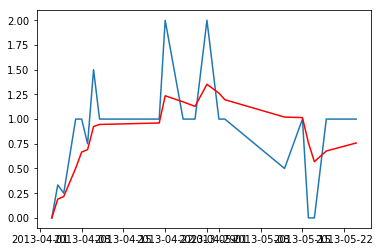

In [37]:
# 指数加权移动平均法
# expwighted_avg = pd.ewma(ts_log, halflife=12)
# expwighted_avg = ts_log.ewm(3).mean()  # set sliding window size to be 3
expwighted_avg = ts.ewm(3).mean()  # set sliding window size to be 3
# plt.plot(ts_log)
plt.plot(ts)
plt.plot(expwighted_avg, color='red')

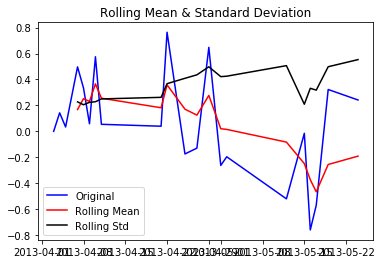

Results of Dickey-Fuller Test:
Test Statistic                 -0.000000
p-value                         0.958532
#Lags Used                      9.000000
Number of Observations Used    11.000000
Critical Value (1%)            -4.223238
Critical Value (5%)            -3.189369
Critical Value (10%)           -2.729839
dtype: float64


In [38]:
# 定义指数衰减量
# ts_log_ewma_diff = ts_log - expwighted_avg
ts_ewma_diff = ts - expwighted_avg
test_stationarity(ts_ewma_diff)

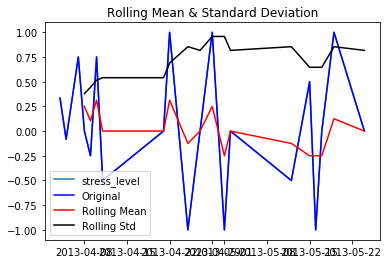

Results of Dickey-Fuller Test:
Test Statistic                 -0.000000
p-value                         0.958532
#Lags Used                      9.000000
Number of Observations Used    10.000000
Critical Value (1%)            -4.331573
Critical Value (5%)            -3.232950
Critical Value (10%)           -2.748700
dtype: float64


In [39]:
# 差分 -> 消除季节性和趋势
# ts_log_diff = ts_log - ts_log.shift()
ts_diff = ts - ts.shift()
# plt.plot(ts_log_diff)
plt.plot(ts_diff)

# 验证差分效果(有无更平稳)
# ts_log_diff.dropna(inplace=True)
ts_diff.dropna(inplace=True)
# test_stationarity(ts_log_diff)
test_stationarity(ts_diff)    # p-value还是很大

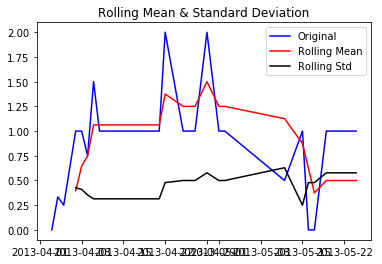

Results of Dickey-Fuller Test:
Test Statistic                 -0.000000
p-value                         0.958532
#Lags Used                      9.000000
Number of Observations Used    11.000000
Critical Value (1%)            -4.223238
Critical Value (5%)            -3.189369
Critical Value (10%)           -2.729839
dtype: float64


/anaconda3/envs/si618/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1510: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


In [48]:
# 用同样的方法导入并smooth其他data(sleep, etc.)

test_stationarity(ts)

def plot_ts_moving_avg(ts):
    # 移动平均数
    moving_avg = ts.rolling(3).mean()  

    plt.plot(ts)
    plt.plot(moving_avg, color='red')

    
def plot_ts_expwighted_avg(ts):
    # 指数加权移动平均法
    expwighted_avg = ts.ewm(3).mean() 
    plt.plot(ts)
    plt.plot(expwighted_avg, color='red')


In [40]:
# 预测时间序列
from statsmodels.tsa.stattools import acf, pacf  # 时间序列的自回归函数和部分自回归函数
# lag_acf = acf(ts_log_diff, nlags=3)
lag_acf = acf(ts_diff, nlags=3)
# lag_pacf = pacf(ts_log_diff, nlags=3, method='ols')
lag_pacf = pacf(ts_diff, nlags=3, method='ols')

# 见下下面acf, pacf visualization

Text(0.5, 1.0, 'Autocorrelation Function')

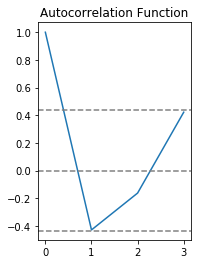

In [42]:
#Plot ACF:  # 自相关函数（ACF）：这是时间序列和它自身滞后版本之间的相关性的测试
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
# plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
# plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

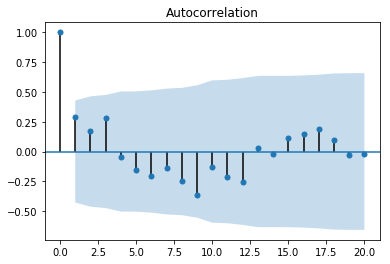

In [43]:
# 法二: plot ACF(自相关)  
# 图中 x 轴表示滞后值，y 轴上 -1 和 1 之间则表现了这些滞后值的正负相关性。
# 蓝色区域中的点表示统计学显着性。滞后值为 0 相关性为 1 的点表示观察值与其本身 100% 正相关。
# 这个分析为后续的比较过程提供了一个很好的基准。

from statsmodels.graphics.tsaplots import plot_acf
plot_acf(ts)
plt.show()

# 解读：当lag < 3时，观察值与其本身呈正相关；当lag在3-13之间，观察值与其本身呈负相关。当lag>13时，观察值又与其自身成正相关。

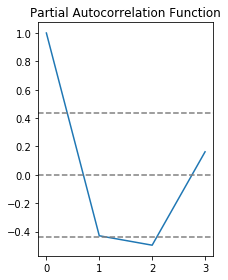

In [44]:
#Plot PACF:  # 部分自相关函数(PACF):这是时间序列和它自身滞后版本之间的相关性测试，但是是在预测（已经通过比较干预得到解释）的变量后。
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
# plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
# plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [45]:
from statsmodels.tsa.arima_model import ARIMA

/anaconda3/envs/si618/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/envs/si618/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5, 1.0, 'RSS: 5.1710')

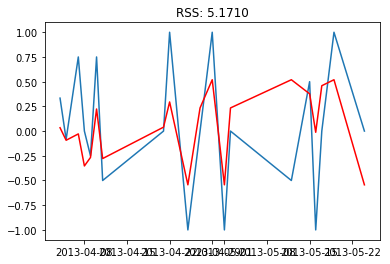

In [46]:
# 自回归（AR）模型
# model = ARIMA(ts_log, order=(2, 1, 0)) 
model = ARIMA(ts, order=(2, 1, 0)) 
results_AR = model.fit(disp=-1)  
# plt.plot(ts_log_diff)
plt.plot(ts_diff)
plt.plot(results_AR.fittedvalues, color='red')
# plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_diff)**2))


In [23]:
# 组合模型
# model = ARIMA(ts_log, order=(0, 1, 2))  
model = ARIMA(ts, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
# plt.plot(ts_log_diff)
plt.plot(ts_diff)
plt.plot(results_MA.fittedvalues, color='red')
# plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_diff)**2))

NameError: name 'ARIMA' is not defined

In [22]:
# 移动平均数（MA）模型
# model = ARIMA(ts_log, order=(2, 1, 2))
model = ARIMA(ts, order=(2, 1, 2))
results_ARIMA = model.fit(disp=-1)  
# plt.plot(ts_log_diff)
plt.plot(ts_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
# plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_diff)**2))

NameError: name 'ARIMA' is not defined

In [40]:
# 倒回到原始区间 
# predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
# print predictions_ARIMA_diff.head()

predictions_AR_diff = pd.Series(results_AR.fittedvalues, copy=True) #只有AR模型成功了
print (predictions_AR_diff.head())

resp_time
2013-04-04    0.033912
2013-04-05   -0.092863
2013-04-07   -0.028725
2013-04-08   -0.352865
2013-04-09   -0.267166
dtype: float64


In [41]:
# 累计总和
# predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
# print predictions_ARIMA_diff_cumsum.head()

predictions_AR_diff_cumsum = predictions_AR_diff.cumsum()
print (predictions_AR_diff_cumsum.head())

resp_time
2013-04-04    0.033912
2013-04-05   -0.058951
2013-04-07   -0.087676
2013-04-08   -0.440541
2013-04-09   -0.707707
dtype: float64


In [42]:
# 添加到基本值

# predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
# predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
# predictions_ARIMA_log.head()

predictions_AR = pd.Series(ts.ix[0], index=ts.index)
predictions_AR = predictions_AR.add(predictions_AR_diff_cumsum,fill_value=0)
predictions_AR.head()

/anaconda3/envs/si618/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


resp_time
2013-04-03    0.000000
2013-04-04    0.033912
2013-04-05   -0.058951
2013-04-07   -0.087676
2013-04-08   -0.440541
dtype: float64

# Granger Causality Analysis (combine user data)

In [ ]:
# 小结：
# 单个user的time series data量太少了，可以按原来加入时壳去计算？
# 如何研究多个user?

In [20]:
def get_merged_data(user_id):
    
    try:
        stress = get_stress_data('Data/Stress/Stress_'+ user_id +'.json')
        activity = get_actitivity_data('Data/Activity/Activity_'+ user_id + '.json') 
        sleep = get_sleep_data('Data/Sleep/Sleep_' + user_id + '.json')
        behavior = get_behavior_data('Data/Behavior/Behavior_' + user_id + '.json')
        exercise = get_exercise_date('Data/Exercise/Exercise_' + user_id + '.json')
        lab = get_lab_data('Data/Lab/Lab_' + user_id + '.json')
        social = get_social_data('Data/Social/Social_' + user_id + '.json')

        joined_df = pd.merge(stress,sleep,how='inner',on='resp_time') 
        joined_df = pd.merge(joined_df,exercise,how='inner',on='resp_time') 
        joined_df = pd.merge(joined_df,activity,how='inner',on='resp_time') 
        joined_df = pd.merge(joined_df,social,how='inner',on='resp_time') 
        joined_df = pd.merge(joined_df,behavior,how='inner',on='resp_time') 
        
        return joined_df
    
    except:
        return None
        

for f_name in glob('Data/Stress/*.json'):
    user_id = f_name.split('_')[1].split('.')[0]
    joined_df = get_merged_data(user_id)   # 将每个user导出为一个csv
    
    try:
        joined_df.to_csv('Students/'+ user_id +'_data.csv',index = False)
    except:
        pass
    

/anaconda3/envs/si618/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/anaconda3/envs/si618/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/envs/si618/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

# Data Processing

In [ ]:
# next step: 将所有user的时间合起来，用mean来计算每个field的值 （得到一个data frame）代表所有user
# 计算general trend

In [21]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
users = []
for f_name in glob('Students/*.csv'):
    user = pd.read_csv(f_name, parse_dates=['resp_time'], index_col=['resp_time'],date_parser=dateparse)
    users.append(user)

df = pd.concat(users, ignore_index=False)
df.head()

,stress_level,sleep_hour,sleep_rate,exercise,Social2,working,relaxing,social_number,anxious,calm,disorganized,enthusiastic,critical,conventional
resp_time,,,,,,,,,,,,,,
2013-04-07,2.0,8.0,2.0,2.0,3.0,2.428571,1.500000,2.0,2.000000,3.444444,2.222222,4.444444,1.444444,2.333333
2013-04-14,1.5,8.0,2.0,2.0,2.8,3.000000,1.000000,2.0,1.000000,3.000000,2.000000,4.000000,1.000000,2.000000
2013-04-15,2.0,8.0,2.0,3.0,2.8,3.000000,1.000000,2.0,2.000000,3.000000,3.000000,5.000000,1.000000,3.000000
2013-04-01,1.6,6.0,2.0,1.0,3.0,3.370370,1.444444,2.5,2.705882,3.970588,2.558824,2.764706,1.941176,4.060606
2013-04-03,1.0,6.0,3.0,1.0,3.0,3.370370,1.444444,3.0,2.705882,3.970588,2.558824,2.764706,1.941176,4.060606


In [22]:
df.sort_values(by='resp_time').head()
all_data = df.groupby(level=0).mean()
all_data.head()

,stress_level,sleep_hour,sleep_rate,exercise,Social2,working,relaxing,social_number,anxious,calm,disorganized,enthusiastic,critical,conventional
resp_time,,,,,,,,,,,,,,
2013-04-01,1.150000,6.666667,2.208333,1.000,3.0000,2.601025,1.596726,2.916667,1.945701,3.912519,1.681373,3.162330,1.696833,3.140152
2013-04-02,1.089286,7.125000,2.000000,1.875,2.2500,2.374360,1.624616,3.500000,2.246739,3.389130,2.723913,2.636957,2.217391,2.340217
2013-04-03,0.859848,6.750000,2.125000,2.125,2.0000,2.543189,1.675641,3.029167,2.395387,3.586777,2.222742,2.893096,2.147191,3.271831
2013-04-04,0.968750,7.750000,1.687500,2.125,2.1250,2.605629,1.553327,3.000000,2.674981,3.460283,2.494865,3.018233,2.297710,3.414743
2013-04-05,1.307212,5.687500,1.968750,1.375,2.4375,2.470764,1.429701,3.512500,2.643731,3.591235,2.173436,2.826269,1.878067,3.264445


In [23]:
def crosscorr(datax, datay, lag=0):  # y -> x
    """ Lag-N cross correlation. 
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length

    Returns
    ----------
    crosscorr : float
    """
    return datax.corr(datay.shift(lag))

# stress vs. sleep hour

In [21]:
# 两两分析 - stress level vs. 其他
from statsmodels.tsa.stattools import grangercausalitytests
# x = all_data[['stress_level','sleep_hour']] # p=0.1821
x = all_data[['sleep_hour','stress_level']] # p=0.0547 
result = grangercausalitytests(x, maxlag=6, addconst=True, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2653  , p=0.6090  , df_denom=44, df_num=1
ssr based chi2 test:   chi2=0.2834  , p=0.5945  , df=1
likelihood ratio test: chi2=0.2826  , p=0.5950  , df=1
parameter F test:         F=0.2653  , p=0.6090  , df_denom=44, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.3738  , p=0.6905  , df_denom=41, df_num=2
ssr based chi2 test:   chi2=0.8387  , p=0.6575  , df=2
likelihood ratio test: chi2=0.8311  , p=0.6600  , df=2
parameter F test:         F=0.3738  , p=0.6905  , df_denom=41, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.3606  , p=0.7817  , df_denom=38, df_num=3
ssr based chi2 test:   chi2=1.2812  , p=0.7336  , df=3
likelihood ratio test: chi2=1.2633  , p=0.7379  , df=3
parameter F test:         F=0.3606  , p=0.7817  , df_denom=38, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.4572  , p=0.0636  , df_d

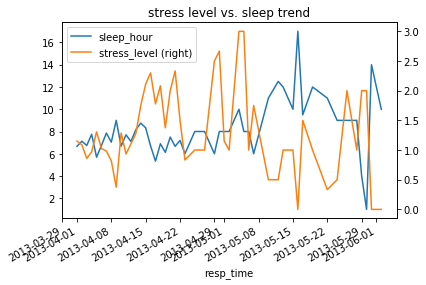

In [48]:
all_data['sleep_hour'].plot(grid=True, label="sleep_hour", legend=True)
all_data['stress_level'].plot(secondary_y=True, label="stress_level", legend=True)
plt.title('stress level vs. sleep trend')

plt.savefig('pics/stress_sleep.png')

In [57]:
crosscorr(all_data['sleep_hour'],all_data['stress_level'], lag=4)    # 0.407 | stress_level cause sleep_hour
# crosscorr(all_data['stress_level'], all_data['sleep_hour'],lag=5)    # sleep_hour 没有cause stress_level 

0.17036854128754322

# stress vs. exercise

In [59]:
# x = all_data[['stress_level','exercise']] # p=0.4319
x = all_data[['exercise','stress_level']]  #  p=0.0195
result = grangercausalitytests(x, maxlag=4, addconst=True, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=10.1582 , p=0.0026  , df_denom=44, df_num=1
ssr based chi2 test:   chi2=10.8508 , p=0.0010  , df=1
likelihood ratio test: chi2=9.7628  , p=0.0018  , df=1
parameter F test:         F=10.1582 , p=0.0026  , df_denom=44, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=5.4178  , p=0.0082  , df_denom=41, df_num=2
ssr based chi2 test:   chi2=12.1571 , p=0.0023  , df=2
likelihood ratio test: chi2=10.7873 , p=0.0045  , df=2
parameter F test:         F=5.4178  , p=0.0082  , df_denom=41, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.7114  , p=0.0195  , df_denom=38, df_num=3
ssr based chi2 test:   chi2=13.1854 , p=0.0043  , df=3
likelihood ratio test: chi2=11.5637 , p=0.0090  , df=3
parameter F test:         F=3.7114  , p=0.0195  , df_denom=38, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.9786  , p=0.0323  , df_d

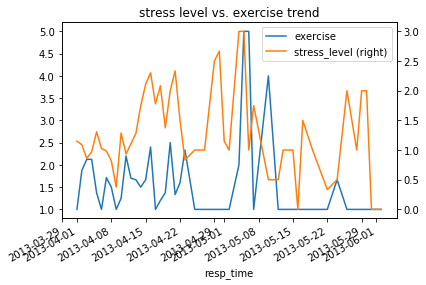

In [58]:
all_data['exercise'].plot(grid=True, label="exercise", legend=True)
all_data['stress_level'].plot(secondary_y=True, label="stress_level", legend=True)
plt.title('stress level vs. exercise trend')

plt.savefig('pics/stress_exercise.png')

In [60]:
crosscorr(all_data['exercise'],all_data['stress_level'], lag=3) # 0.133
# crosscorr(all_data['stress_level'],all_data['exercise'], lag=3) # 负值

0.1333893976801173

# stress vs. social

In [66]:
# x = all_data[['stress_level','Social2']] # p=0.1353
x = all_data[['Social2','stress_level']] # p=p=0.0443
result = grangercausalitytests(x, maxlag=5, addconst=True, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3692  , p=0.5466  , df_denom=44, df_num=1
ssr based chi2 test:   chi2=0.3944  , p=0.5300  , df=1
likelihood ratio test: chi2=0.3927  , p=0.5309  , df=1
parameter F test:         F=0.3692  , p=0.5466  , df_denom=44, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.3649  , p=0.6965  , df_denom=41, df_num=2
ssr based chi2 test:   chi2=0.8188  , p=0.6641  , df=2
likelihood ratio test: chi2=0.8116  , p=0.6664  , df=2
parameter F test:         F=0.3649  , p=0.6965  , df_denom=41, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.9191  , p=0.1429  , df_denom=38, df_num=3
ssr based chi2 test:   chi2=6.8177  , p=0.0779  , df=3
likelihood ratio test: chi2=6.3481  , p=0.0958  , df=3
parameter F test:         F=1.9191  , p=0.1429  , df_denom=38, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.7339  , p=0.0443  , df_d

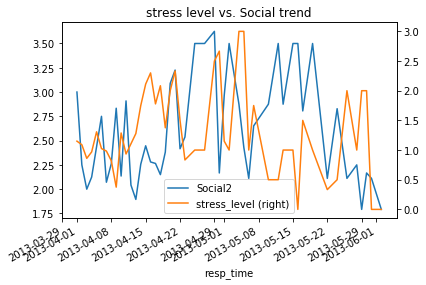

In [61]:
all_data['Social2'].plot(grid=True, label="Social2", legend=True)
all_data['stress_level'].plot(secondary_y=True, label="stress_level", legend=True)
plt.title('stress level vs. Social trend')

plt.savefig('pics/stress_social.png')

In [287]:
crosscorr(all_data['Social2'],all_data['stress_level'], lag=3)  # 0.16 | stress level cause social 
# crosscorr(all_data['stress_level'], all_data['Social2'],lag=3) 负值

-0.094714447212809

# stress vs. working

In [71]:
x = all_data[['stress_level','working']] # p=0.0077
# x = all_data[['working','stress_level']] # p=0.0322
result = grangercausalitytests(x, maxlag=5, addconst=True, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4028  , p=0.5289  , df_denom=44, df_num=1
ssr based chi2 test:   chi2=0.4303  , p=0.5119  , df=1
likelihood ratio test: chi2=0.4283  , p=0.5128  , df=1
parameter F test:         F=0.4028  , p=0.5289  , df_denom=44, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.7399  , p=0.1883  , df_denom=41, df_num=2
ssr based chi2 test:   chi2=3.9041  , p=0.1420  , df=2
likelihood ratio test: chi2=3.7472  , p=0.1536  , df=2
parameter F test:         F=1.7399  , p=0.1883  , df_denom=41, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=4.5928  , p=0.0077  , df_denom=38, df_num=3
ssr based chi2 test:   chi2=16.3165 , p=0.0010  , df=3
likelihood ratio test: chi2=13.9224 , p=0.0030  , df=3
parameter F test:         F=4.5928  , p=0.0077  , df_denom=38, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.3676  , p=0.0197  , df_d

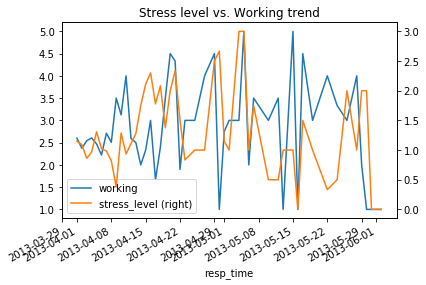

In [67]:
all_data['working'].plot(grid=True, label="working", legend=True)
all_data['stress_level'].plot(secondary_y=True, label="stress_level", legend=True)
plt.title('Stress level vs. Working trend')
plt.savefig('pics/stress_working.png')

In [293]:
crosscorr(all_data['stress_level'],all_data['working'], lag=3) # 图看起来明显是working cause stress level, 但为什么crosscorr为负值？

-0.25618003904841136

# stress vs. relaxing

In [73]:
# x = all_data[['stress_level','relaxing']] # p=0.2559
x = all_data[['relaxing','stress_level']]  # p=0.4519
result = grangercausalitytests(x, maxlag=5, addconst=True, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5760  , p=0.4519  , df_denom=44, df_num=1
ssr based chi2 test:   chi2=0.6153  , p=0.4328  , df=1
likelihood ratio test: chi2=0.6113  , p=0.4343  , df=1
parameter F test:         F=0.5760  , p=0.4519  , df_denom=44, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4031  , p=0.6709  , df_denom=41, df_num=2
ssr based chi2 test:   chi2=0.9044  , p=0.6362  , df=2
likelihood ratio test: chi2=0.8956  , p=0.6390  , df=2
parameter F test:         F=0.4031  , p=0.6709  , df_denom=41, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.3946  , p=0.7576  , df_denom=38, df_num=3
ssr based chi2 test:   chi2=1.4019  , p=0.7051  , df=3
likelihood ratio test: chi2=1.3805  , p=0.7101  , df=3
parameter F test:         F=0.3946  , p=0.7576  , df_denom=38, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.8692  , p=0.4921  , df_d

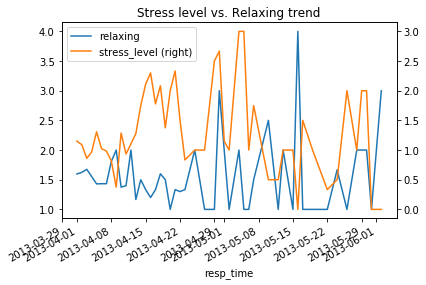

In [72]:
all_data['relaxing'].plot(grid=True, label="relaxing", legend=True)
all_data['stress_level'].plot(secondary_y=True, label="stress_level", legend=True)
plt.title('Stress level vs. Relaxing trend')

plt.savefig('pics/stress_relaxing.png')

In [298]:
crosscorr(all_data['relaxing'],all_data['stress_level'], lag=4) # 负值，没太大关系

-0.23449836819815187

# stress vs. anxious

In [77]:
# x = all_data[['stress_level','anxious']] # 研究的是 social是否cause stress_level  0.17 最低
x = all_data[['anxious','stress_level']] # p=0.0380
result = grangercausalitytests(x, maxlag=5, addconst=True, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3749  , p=0.5435  , df_denom=44, df_num=1
ssr based chi2 test:   chi2=0.4005  , p=0.5268  , df=1
likelihood ratio test: chi2=0.3988  , p=0.5277  , df=1
parameter F test:         F=0.3749  , p=0.5435  , df_denom=44, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.2703  , p=0.0481  , df_denom=41, df_num=2
ssr based chi2 test:   chi2=7.3381  , p=0.0255  , df=2
likelihood ratio test: chi2=6.8085  , p=0.0332  , df=2
parameter F test:         F=3.2703  , p=0.0481  , df_denom=41, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.0013  , p=0.0424  , df_denom=38, df_num=3
ssr based chi2 test:   chi2=10.6624 , p=0.0137  , df=3
likelihood ratio test: chi2=9.5689  , p=0.0226  , df=3
parameter F test:         F=3.0013  , p=0.0424  , df_denom=38, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.8529  , p=0.0380  , df_d

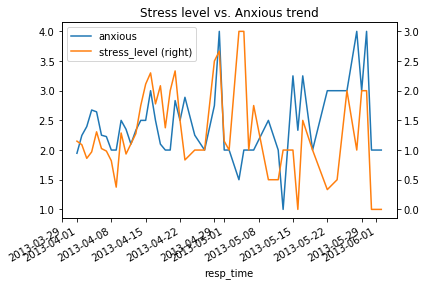

In [74]:
all_data['anxious'].plot(grid=True, label="anxious", legend=True)
all_data['stress_level'].plot(secondary_y=True, label="stress_level", legend=True)
plt.title('Stress level vs. Anxious trend')

plt.savefig('pics/stress_anxious.png')

In [311]:
crosscorr(all_data['stress_level'],all_data['anxious'],lag=4) 

0.20283769324602172

# stress vs. calm

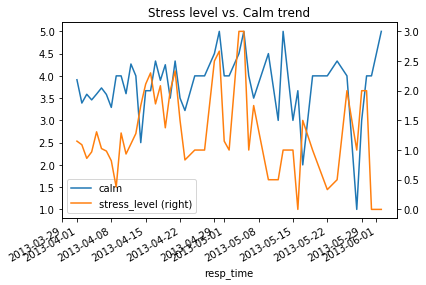

In [82]:
all_data['calm'].plot(grid=True, label="calm", legend=True)
all_data['stress_level'].plot(secondary_y=True, label="stress_level", legend=True)
plt.title('Stress level vs. Calm trend')

plt.savefig('pics/stress_calm.png')

In [81]:
# x = all_data[['stress_level','calm']] # p=0.1082
x = all_data[['calm','stress_level']]  # p=0.0178
result = grangercausalitytests(x, maxlag=6, addconst=True, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6709  , p=0.4171  , df_denom=44, df_num=1
ssr based chi2 test:   chi2=0.7167  , p=0.3972  , df=1
likelihood ratio test: chi2=0.7113  , p=0.3990  , df=1
parameter F test:         F=0.6709  , p=0.4171  , df_denom=44, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.2900  , p=0.7498  , df_denom=41, df_num=2
ssr based chi2 test:   chi2=0.6508  , p=0.7222  , df=2
likelihood ratio test: chi2=0.6463  , p=0.7239  , df=2
parameter F test:         F=0.2900  , p=0.7498  , df_denom=41, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.2537  , p=0.0321  , df_denom=38, df_num=3
ssr based chi2 test:   chi2=11.5591 , p=0.0091  , df=3
likelihood ratio test: chi2=10.2881 , p=0.0163  , df=3
parameter F test:         F=3.2537  , p=0.0321  , df_denom=38, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.7358  , p=0.0442  , df_d

In [20]:
crosscorr(all_data['stress_level'],all_data['calm'],lag=3)  # calm cause stress level

0.4066923870176491

# disorganized vs. stress

In [21]:
all_data.head()

,stress_level,sleep_hour,sleep_rate,exercise,Social2,working,relaxing,social_number,anxious,calm,disorganized,enthusiastic,critical,conventional
resp_time,,,,,,,,,,,,,,
2013-04-01,1.150000,6.666667,2.208333,1.000,3.0000,2.601025,1.596726,2.916667,1.945701,3.912519,1.681373,3.162330,1.696833,3.140152
2013-04-02,1.089286,7.125000,2.000000,1.875,2.2500,2.374360,1.624616,3.500000,2.246739,3.389130,2.723913,2.636957,2.217391,2.340217
2013-04-03,0.859848,6.750000,2.125000,2.125,2.0000,2.543189,1.675641,3.029167,2.395387,3.586777,2.222742,2.893096,2.147191,3.271831
2013-04-04,0.968750,7.750000,1.687500,2.125,2.1250,2.605629,1.553327,3.000000,2.674981,3.460283,2.494865,3.018233,2.297710,3.414743
2013-04-05,1.307212,5.687500,1.968750,1.375,2.4375,2.470764,1.429701,3.512500,2.643731,3.591235,2.173436,2.826269,1.878067,3.264445


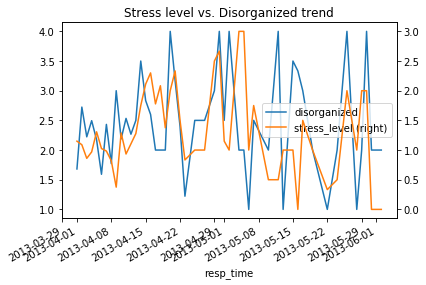

In [83]:
all_data['disorganized'].plot(grid=True, label="disorganized", legend=True)
all_data['stress_level'].plot(secondary_y=True, label="stress_level", legend=True)
plt.title('Stress level vs. Disorganized trend') # 图看起来像disorganized trend cause stress level

plt.savefig('pics/stress_disorganized.png')

In [85]:
x = all_data[['stress_level','disorganized']] # p=0.6256
# x = all_data[['disorganized','stress_level']] 
result = grangercausalitytests(x, maxlag=5, addconst=True, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0014  , p=0.9701  , df_denom=44, df_num=1
ssr based chi2 test:   chi2=0.0015  , p=0.9689  , df=1
likelihood ratio test: chi2=0.0015  , p=0.9689  , df=1
parameter F test:         F=0.0014  , p=0.9701  , df_denom=44, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4517  , p=0.6397  , df_denom=41, df_num=2
ssr based chi2 test:   chi2=1.0135  , p=0.6025  , df=2
likelihood ratio test: chi2=1.0025  , p=0.6058  , df=2
parameter F test:         F=0.4517  , p=0.6397  , df_denom=41, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.5896  , p=0.6256  , df_denom=38, df_num=3
ssr based chi2 test:   chi2=2.0946  , p=0.5530  , df=3
likelihood ratio test: chi2=2.0473  , p=0.5627  , df=3
parameter F test:         F=0.5896  , p=0.6256  , df_denom=38, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.5273  , p=0.7164  , df_d

In [27]:
crosscorr(all_data['stress_level'],all_data['disorganized'],lag=3)  # calm cause stress level

0.06824027766467779

# stress level vs. enthusiastic

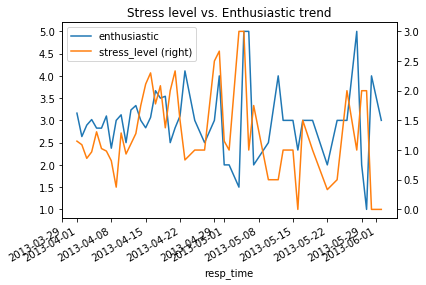

In [86]:
all_data['enthusiastic'].plot(grid=True, label="enthusiastic", legend=True)
all_data['stress_level'].plot(secondary_y=True, label="stress_level", legend=True)
plt.title('Stress level vs. Enthusiastic trend') # 图看起来像disorganized trend cause stress level

plt.savefig('pics/stress_enthusiastic.png')

In [30]:
# x = all_data[['stress_level','enthusiastic']] # p=0.1534
x = all_data[['enthusiastic','stress_level']] # p=0.0114  | stress level cause enthusiastic
result = grangercausalitytests(x, maxlag=5, addconst=True, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.3565  , p=0.0154  , df_denom=44, df_num=1
ssr based chi2 test:   chi2=6.7899  , p=0.0092  , df=1
likelihood ratio test: chi2=6.3421  , p=0.0118  , df=1
parameter F test:         F=6.3565  , p=0.0154  , df_denom=44, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=5.0034  , p=0.0114  , df_denom=41, df_num=2
ssr based chi2 test:   chi2=11.2271 , p=0.0036  , df=2
likelihood ratio test: chi2=10.0458 , p=0.0066  , df=2
parameter F test:         F=5.0034  , p=0.0114  , df_denom=41, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.0929  , p=0.0383  , df_denom=38, df_num=3
ssr based chi2 test:   chi2=10.9879 , p=0.0118  , df=3
likelihood ratio test: chi2=9.8313  , p=0.0201  , df=3
parameter F test:         F=3.0929  , p=0.0383  , df_denom=38, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.1596  , p=0.0256  , df_d

In [34]:
crosscorr(all_data['enthusiastic'],all_data['stress_level'],lag=2)  # 0.039

0.03914914274070521

# stress level vs.critical

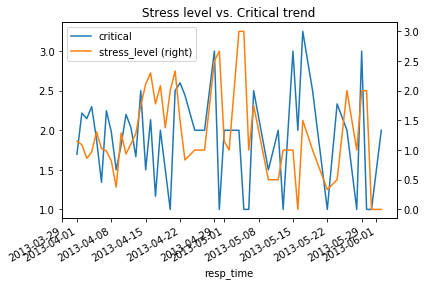

In [87]:
all_data['critical'].plot(grid=True, label="critical", legend=True)
all_data['stress_level'].plot(secondary_y=True, label="stress_level", legend=True)
plt.title('Stress level vs. Critical trend') # 图看起来像disorganized trend cause stress level

plt.savefig('pics/stress_critical.png')

In [37]:
x = all_data[['critical','stress_level']] # p=0.0175  | stess level cause critical 
result = grangercausalitytests(x, maxlag=5, addconst=True, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=9.5889  , p=0.0034  , df_denom=44, df_num=1
ssr based chi2 test:   chi2=10.2427 , p=0.0014  , df=1
likelihood ratio test: chi2=9.2662  , p=0.0023  , df=1
parameter F test:         F=9.5889  , p=0.0034  , df_denom=44, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.4710  , p=0.0175  , df_denom=41, df_num=2
ssr based chi2 test:   chi2=10.0325 , p=0.0066  , df=2
likelihood ratio test: chi2=9.0754  , p=0.0107  , df=2
parameter F test:         F=4.4710  , p=0.0175  , df_denom=41, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.6673  , p=0.0614  , df_denom=38, df_num=3
ssr based chi2 test:   chi2=9.4758  , p=0.0236  , df=3
likelihood ratio test: chi2=8.5993  , p=0.0351  , df=3
parameter F test:         F=2.6673  , p=0.0614  , df_denom=38, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.7847  , p=0.1540  , df_d

In [39]:
# crosscorr(all_data['critical'],all_data['stress_level'],lag=2)# -0.039
crosscorr(all_data['stress_level'],all_data['critical'],lag=2)  # 均为负值

-0.10667486903539919

# stress level vs. conventional

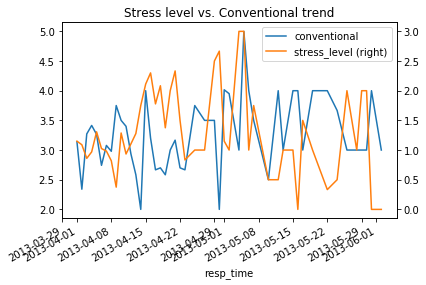

In [88]:
all_data['conventional'].plot(grid=True, label="conventional", legend=True)
all_data['stress_level'].plot(secondary_y=True, label="stress_level", legend=True)
plt.title('Stress level vs. Conventional trend') # 图看起来像disorganized trend cause stress level

plt.savefig('pics/stress_conventional.png')

In [43]:
# x = all_data[['conventional','stress_level']]  # p=0.2449
x = all_data[['stress_level','conventional']]   # p=0.1892   | more of conventional cause stress，但两者都不显著
result = grangercausalitytests(x, maxlag=6, addconst=True, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0220  , p=0.8826  , df_denom=44, df_num=1
ssr based chi2 test:   chi2=0.0235  , p=0.8780  , df=1
likelihood ratio test: chi2=0.0235  , p=0.8781  , df=1
parameter F test:         F=0.0220  , p=0.8826  , df_denom=44, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.3809  , p=0.6856  , df_denom=41, df_num=2
ssr based chi2 test:   chi2=0.8547  , p=0.6522  , df=2
likelihood ratio test: chi2=0.8468  , p=0.6548  , df=2
parameter F test:         F=0.3809  , p=0.6856  , df_denom=41, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.6724  , p=0.1892  , df_denom=38, df_num=3
ssr based chi2 test:   chi2=5.9415  , p=0.1145  , df=3
likelihood ratio test: chi2=5.5807  , p=0.1339  , df=3
parameter F test:         F=1.6724  , p=0.1892  , df_denom=38, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.2332  , p=0.3147  , df_d

In [45]:
# crosscorr(all_data['stress_level'],all_data['conventional'],lag=3)  # 均为负值
crosscorr(all_data['conventional'],all_data['stress_level'],lag=3)  

-0.23132567667596637

# ts prediction

In [24]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics

    rolmean = timeseries.rolling(4).mean()  # data量太少,故调小一点sliding window size
    rolstd = timeseries.rolling(4).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.savefig('pics/rolling_means&sd.png')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)


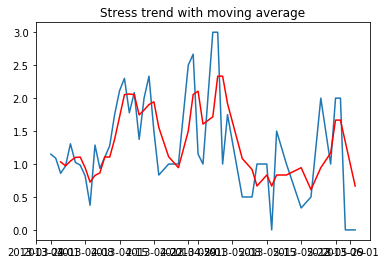

In [25]:
ts_stress = all_data[['stress_level']]
moving_avg = ts_stress.rolling(3).mean()

plt.plot(ts_stress)
plt.plot(moving_avg, color='red')
plt.title('Stress trend with moving average')
plt.savefig('pics/moving_average.png')

/anaconda3/envs/si618/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


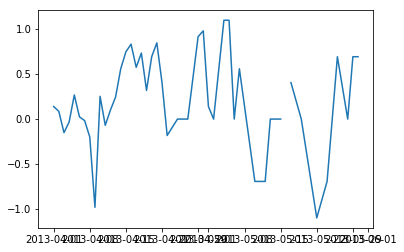

In [26]:
# plot the log-transformed value
ts_log = np.log(ts_stress)  
plt.plot(ts_log)

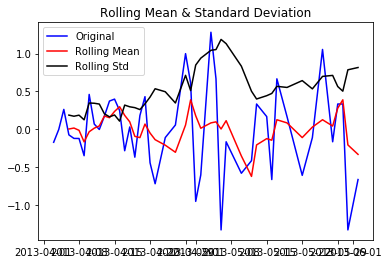

Results of Dickey-Fuller Test:


ValueError: too many values to unpack (expected 2)

In [27]:
ts_moving_avg_diff = ts_stress - moving_avg
ts_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_moving_avg_diff)

Text(0.5, 1.0, 'expweighted_avg')

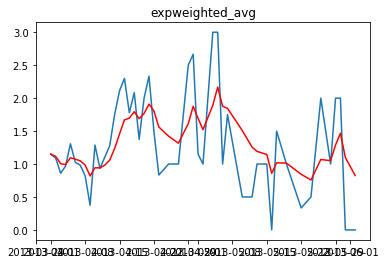

In [30]:
# 指数加权移动平均法
# expwighted_avg = pd.ewma(ts_log, halflife=12)
# expwighted_avg = ts_log.ewm(3).mean()  # set sliding window size to be 3
expwighted_avg = ts_stress.ewm(3).mean()  # set sliding window size to be 3
# plt.plot(ts_log)
plt.plot(ts_stress)
plt.plot(expwighted_avg, color='red')
plt.title('expweighted_avg')

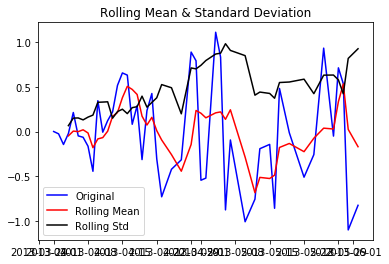

Results of Dickey-Fuller Test:


ValueError: too many values to unpack (expected 2)

In [31]:
# 定义指数衰减量
# ts_log_ewma_diff = ts_log - expwighted_avg
ts_ewma_diff = ts_stress - expwighted_avg
test_stationarity(ts_ewma_diff)

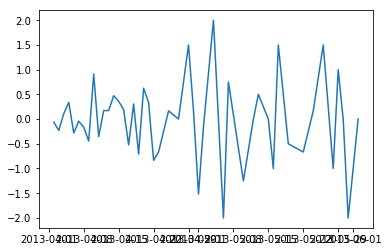

In [32]:
# 差分 -> 消除季节性和趋势
ts_diff = ts_stress - ts_stress.shift()
plt.plot(ts_diff)

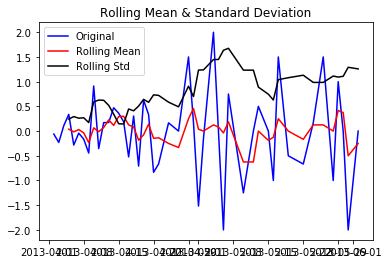

Results of Dickey-Fuller Test:


ValueError: too many values to unpack (expected 2)

In [33]:
# 验证差分效果(有无更平稳)
# ts_log_diff.dropna(inplace=True)
ts_diff.dropna(inplace=True)
# test_stationarity(ts_log_diff)
test_stationarity(ts_diff)    # p-value还是很大


In [34]:
from statsmodels.tsa.stattools import acf, pacf  # 时间序列的自回归函数和部分自回归函数
# lag_acf = acf(ts_log_diff, nlags=3)
lag_acf = acf(ts_diff, nlags=3)
# lag_pacf = pacf(ts_log_diff, nlags=3, method='ols')
lag_pacf = pacf(ts_diff, nlags=3, method='ols')


Text(0.5, 1.0, 'Autocorrelation Function')

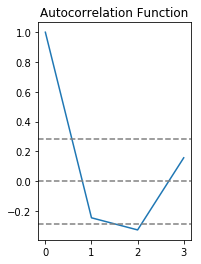

In [35]:
#Plot ACF:  # 自相关函数（ACF）：这是时间序列和它自身滞后版本之间的相关性的测试
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
# plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
# plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

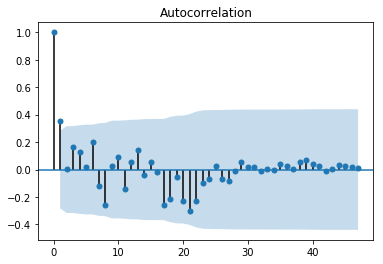

In [36]:
# 法二: plot ACF(自相关)  
# 图中 x 轴表示滞后值，y 轴上 -1 和 1 之间则表现了这些滞后值的正负相关性。
# 蓝色区域中的点表示统计学显着性。滞后值为 0 相关性为 1 的点表示观察值与其本身 100% 正相关。
# 这个分析为后续的比较过程提供了一个很好的基准。

from statsmodels.graphics.tsaplots import plot_acf
plot_acf(ts_stress)
plt.savefig('pics/ACF.png')
plt.show()


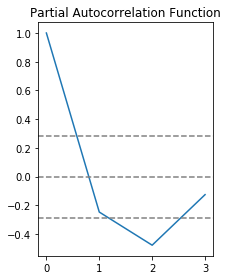

In [37]:
#Plot PACF:  # 部分自相关函数(PACF):这是时间序列和它自身滞后版本之间的相关性测试，但是是在预测（已经通过比较干预得到解释）的变量后。
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
# plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
# plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [88]:
# 调整ts_stress的格式,让它能够放入模型
ts_stress_ = ts_stress.copy()
ts_stress_.head()
ts_stress_ = ts_stress_.reset_index()
ts_stress_.resp_time = ts_stress_.resp_time.astype(ts_stress_.resp_time.values.dtype)
ts_stress_ = ts_stress_.set_index('resp_time')

In [89]:
# ts_stress_.index

DatetimeIndex(['2013-04-01', '2013-04-02', '2013-04-03', '2013-04-04',
               '2013-04-05', '2013-04-06', '2013-04-07', '2013-04-08',
               '2013-04-09', '2013-04-10', '2013-04-11', '2013-04-12',
               '2013-04-13', '2013-04-14', '2013-04-15', '2013-04-16',
               '2013-04-17', '2013-04-18', '2013-04-19', '2013-04-20',
               '2013-04-21', '2013-04-22', '2013-04-23', '2013-04-25',
               '2013-04-27', '2013-04-29', '2013-04-30', '2013-05-01',
               '2013-05-02', '2013-05-04', '2013-05-05', '2013-05-06',
               '2013-05-07', '2013-05-10', '2013-05-12', '2013-05-13',
               '2013-05-15', '2013-05-16', '2013-05-17', '2013-05-19',
               '2013-05-22', '2013-05-24', '2013-05-26', '2013-05-28',
               '2013-05-29', '2013-05-30', '2013-05-31', '2013-06-02'],
              dtype='datetime64[ns]', name='resp_time', freq=None)

In [94]:
from statsmodels.tsa.arima_model import ARIMA
# 自回归（AR）模型
# model = ARIMA(ts_log, order=(2, 1, 0)) 
model = ARIMA(ts_stress, dates = ts_stress_.index,order=(1, 1, 0)) 

# 改变order
# model = ARIMA(ts_stress_, order=(2, 1, 0)) 

# results_AR = model.fit(disp=-1)
results_AR = model.fit(disp=0)  

# plt.plot(ts_log_diff)
plt.plot(ts_diff)
plt.plot(results_AR.fittedvalues, color='red')
# plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_diff)**2))

ValueError: No frequency information was provided with date index and no frequency could be inferred.

In [134]:
# ts_stress
# ts_diff

In [70]:
# 组合模型
# model = ARIMA(ts_log, order=(0, 1, 2))  
# model = ARIMA(ts_stress, order=(0, 1, 2))  
model = ARIMA(ts_stress_, order=(0, 1, 2))  

results_MA = model.fit(disp=-1)  
# plt.plot(ts_log_diff)
plt.plot(ts_diff)
plt.plot(results_MA.fittedvalues, color='red')
# plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_diff)**2))

/anaconda3/envs/si618/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/anaconda3/envs/si618/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ValueError: The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.

In [72]:
# 移动平均数（MA）模型
# model = ARIMA(ts_log, order=(2, 1, 2))
# model = ARIMA(ts_stress, order=(2, 1, 2))
model = ARIMA(ts_stress_, order=(2, 1, 2))

results_ARIMA = model.fit(disp=-1)  
# plt.plot(ts_log_diff)
plt.plot(ts_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
# plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_diff)**2))

/anaconda3/envs/si618/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ValueError: Insufficient degrees of freedom to estimate

In [136]:
# 倒回到原始区间 
# predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
# print predictions_ARIMA_diff.head()

predictions_AR_diff = pd.Series(results_AR.fittedvalues, copy=True) #只有AR模型成功了
print (predictions_AR_diff.head())

resp_time
2013-04-02   -0.012332
2013-04-03   -0.000537
2013-04-04    0.086682
2013-04-05    0.043436
2013-04-06   -0.191904
dtype: float64


In [137]:
# 累计总和
# predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
# print predictions_ARIMA_diff_cumsum.head()

predictions_AR_diff_cumsum = predictions_AR_diff.cumsum()
print (predictions_AR_diff_cumsum.head())

resp_time
2013-04-02   -0.012332
2013-04-03   -0.012869
2013-04-04    0.073812
2013-04-05    0.117248
2013-04-06   -0.074656
dtype: float64


In [139]:
# predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
# predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
# predictions_ARIMA_log.head()

/anaconda3/envs/si618/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


NameError: name 'predictions_ARIMA_diff_cumsum' is not defined

In [142]:
predictions_AR = pd.Series(ts_stress.ix[0], index=ts_stress.index)
predictions_AR = predictions_AR.add(predictions_AR_diff_cumsum,fill_value=0)
predictions_AR.head()

/anaconda3/envs/si618/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


resp_time
2013-04-01         NaN
2013-04-02   -0.012332
2013-04-03   -0.012869
2013-04-04    0.073812
2013-04-05    0.117248
dtype: float64